In [1]:
# Import packages and data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("synthetic_cancer_data.csv", engine='python')

In [2]:
df.head()

Patient_ID   Age  Sex  Smoking_Status  Family_History  TP53_Mutation  \
0           1  68.0  0.0             0.0             1.0            0.0   
1           2  58.0  0.0             0.0             0.0            0.0   
2           3  44.0  1.0             2.0             0.0            1.0   
3           4  72.0  1.0             2.0             0.0            1.0   
4           5  37.0  1.0             0.0             1.0            0.0   

   BRCA1_Mutation  KRAS_Mutation  Total_Mutations  CEA_Level  AFP_Level  \
0             1.0            0.0              3.0   6.104870   2.217815   
1             0.0            0.0              7.0  11.291050   6.718345   
2             1.0            0.0              7.0  13.036086   6.217639   
3             0.0            1.0              4.0   5.899866   4.636553   
4             0.0            0.0              3.0   3.647765  11.127882   

   WBC_Count  CRP_Level  Tumor_Size  Tumor_Location  Tumor_Density  \
0   5.456943   2.920242    5.094221             2.0      59.088868   
1  10.317588   3.142171    9.966969             2.0      15.604580   
2   9.269662   8.049956    8.139703             0.0      56.125238   
3   7.985566   5.437697    6.152194             1.0      82.576326   
4   8.442908   3.181946    3.062536             2.0      51.331589   

   Cancer_Status  
0              0  
1              1  
2              1  
3              1  
4              0

In [3]:
df.columns

Index(['Patient_ID', 'Age', 'Sex', 'Smoking_Status', 'Family_History',
       'TP53_Mutation', 'BRCA1_Mutation', 'KRAS_Mutation', 'Total_Mutations',
       'CEA_Level', 'AFP_Level', 'WBC_Count', 'CRP_Level', 'Tumor_Size',
       'Tumor_Location', 'Tumor_Density', 'Cancer_Status'],
      dtype='object')

In [4]:
df.info()
#Shows that many of the categorical data is coded as numeric data, i.e. smoking status or sex
# There is also an acceptable degree of missingness, with all columns having less than 30% missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient_ID       1000 non-null   int64  
 1   Age              959 non-null    float64
 2   Sex              961 non-null    float64
 3   Smoking_Status   964 non-null    float64
 4   Family_History   961 non-null    float64
 5   TP53_Mutation    957 non-null    float64
 6   BRCA1_Mutation   967 non-null    float64
 7   KRAS_Mutation    954 non-null    float64
 8   Total_Mutations  962 non-null    float64
 9   CEA_Level        955 non-null    float64
 10  AFP_Level        961 non-null    float64
 11  WBC_Count        963 non-null    float64
 12  CRP_Level        956 non-null    float64
 13  Tumor_Size       967 non-null    float64
 14  Tumor_Location   959 non-null    float64
 15  Tumor_Density    956 non-null    float64
 16  Cancer_Status    1000 non-null   int64  
dtypes: float64(15),

In [5]:
Subcolumns = ['Sex', 'Smoking_Status', 'Family_History',
       'TP53_Mutation', 'BRCA1_Mutation', 'KRAS_Mutation',
       'Tumor_Location','Cancer_Status']
df[Subcolumns] = df[Subcolumns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Patient_ID       1000 non-null   int64   
 1   Age              959 non-null    float64 
 2   Sex              961 non-null    category
 3   Smoking_Status   964 non-null    category
 4   Family_History   961 non-null    category
 5   TP53_Mutation    957 non-null    category
 6   BRCA1_Mutation   967 non-null    category
 7   KRAS_Mutation    954 non-null    category
 8   Total_Mutations  962 non-null    float64 
 9   CEA_Level        955 non-null    float64 
 10  AFP_Level        961 non-null    float64 
 11  WBC_Count        963 non-null    float64 
 12  CRP_Level        956 non-null    float64 
 13  Tumor_Size       967 non-null    float64 
 14  Tumor_Location   959 non-null    category
 15  Tumor_Density    956 non-null    float64 
 16  Cancer_Status    1000 non-null   category
d

In [6]:
df.describe()
# What is strange is that some measurements have negative values

Patient_ID         Age  Total_Mutations   CEA_Level   AFP_Level  \
count  1000.000000  959.000000       962.000000  955.000000  961.000000   
mean    500.500000   54.600475         4.224732   10.980162    7.888144   
std     288.819436   13.966423         2.956816    5.650584    4.299786   
min       1.000000    9.081122        -5.781466   -7.042644   -5.917186   
25%     250.750000   44.184147         2.000803    6.883041    4.739818   
50%     500.500000   54.861908         4.304960   11.344496    7.910704   
75%     750.250000   64.993496         6.336567   15.059082   10.997217   
max    1000.000000   96.794119        12.572837   28.545501   21.079736   

        WBC_Count   CRP_Level  Tumor_Size  Tumor_Density  
count  963.000000  956.000000  967.000000     956.000000  
mean     8.167887    5.006850    5.127923      56.352742  
std      2.335048    2.873147    2.955793      26.629045  
min      1.188595   -4.662313   -4.120722     -36.649780  
25%      6.451814    2.909371    3.103796      37.465370  
50%      8.155913    5.110889    5.081299      56.559563  
75%      9.888246    7.112156    7.181305      75.803074  
max     15.843519   12.514428   15.208909     138.355756

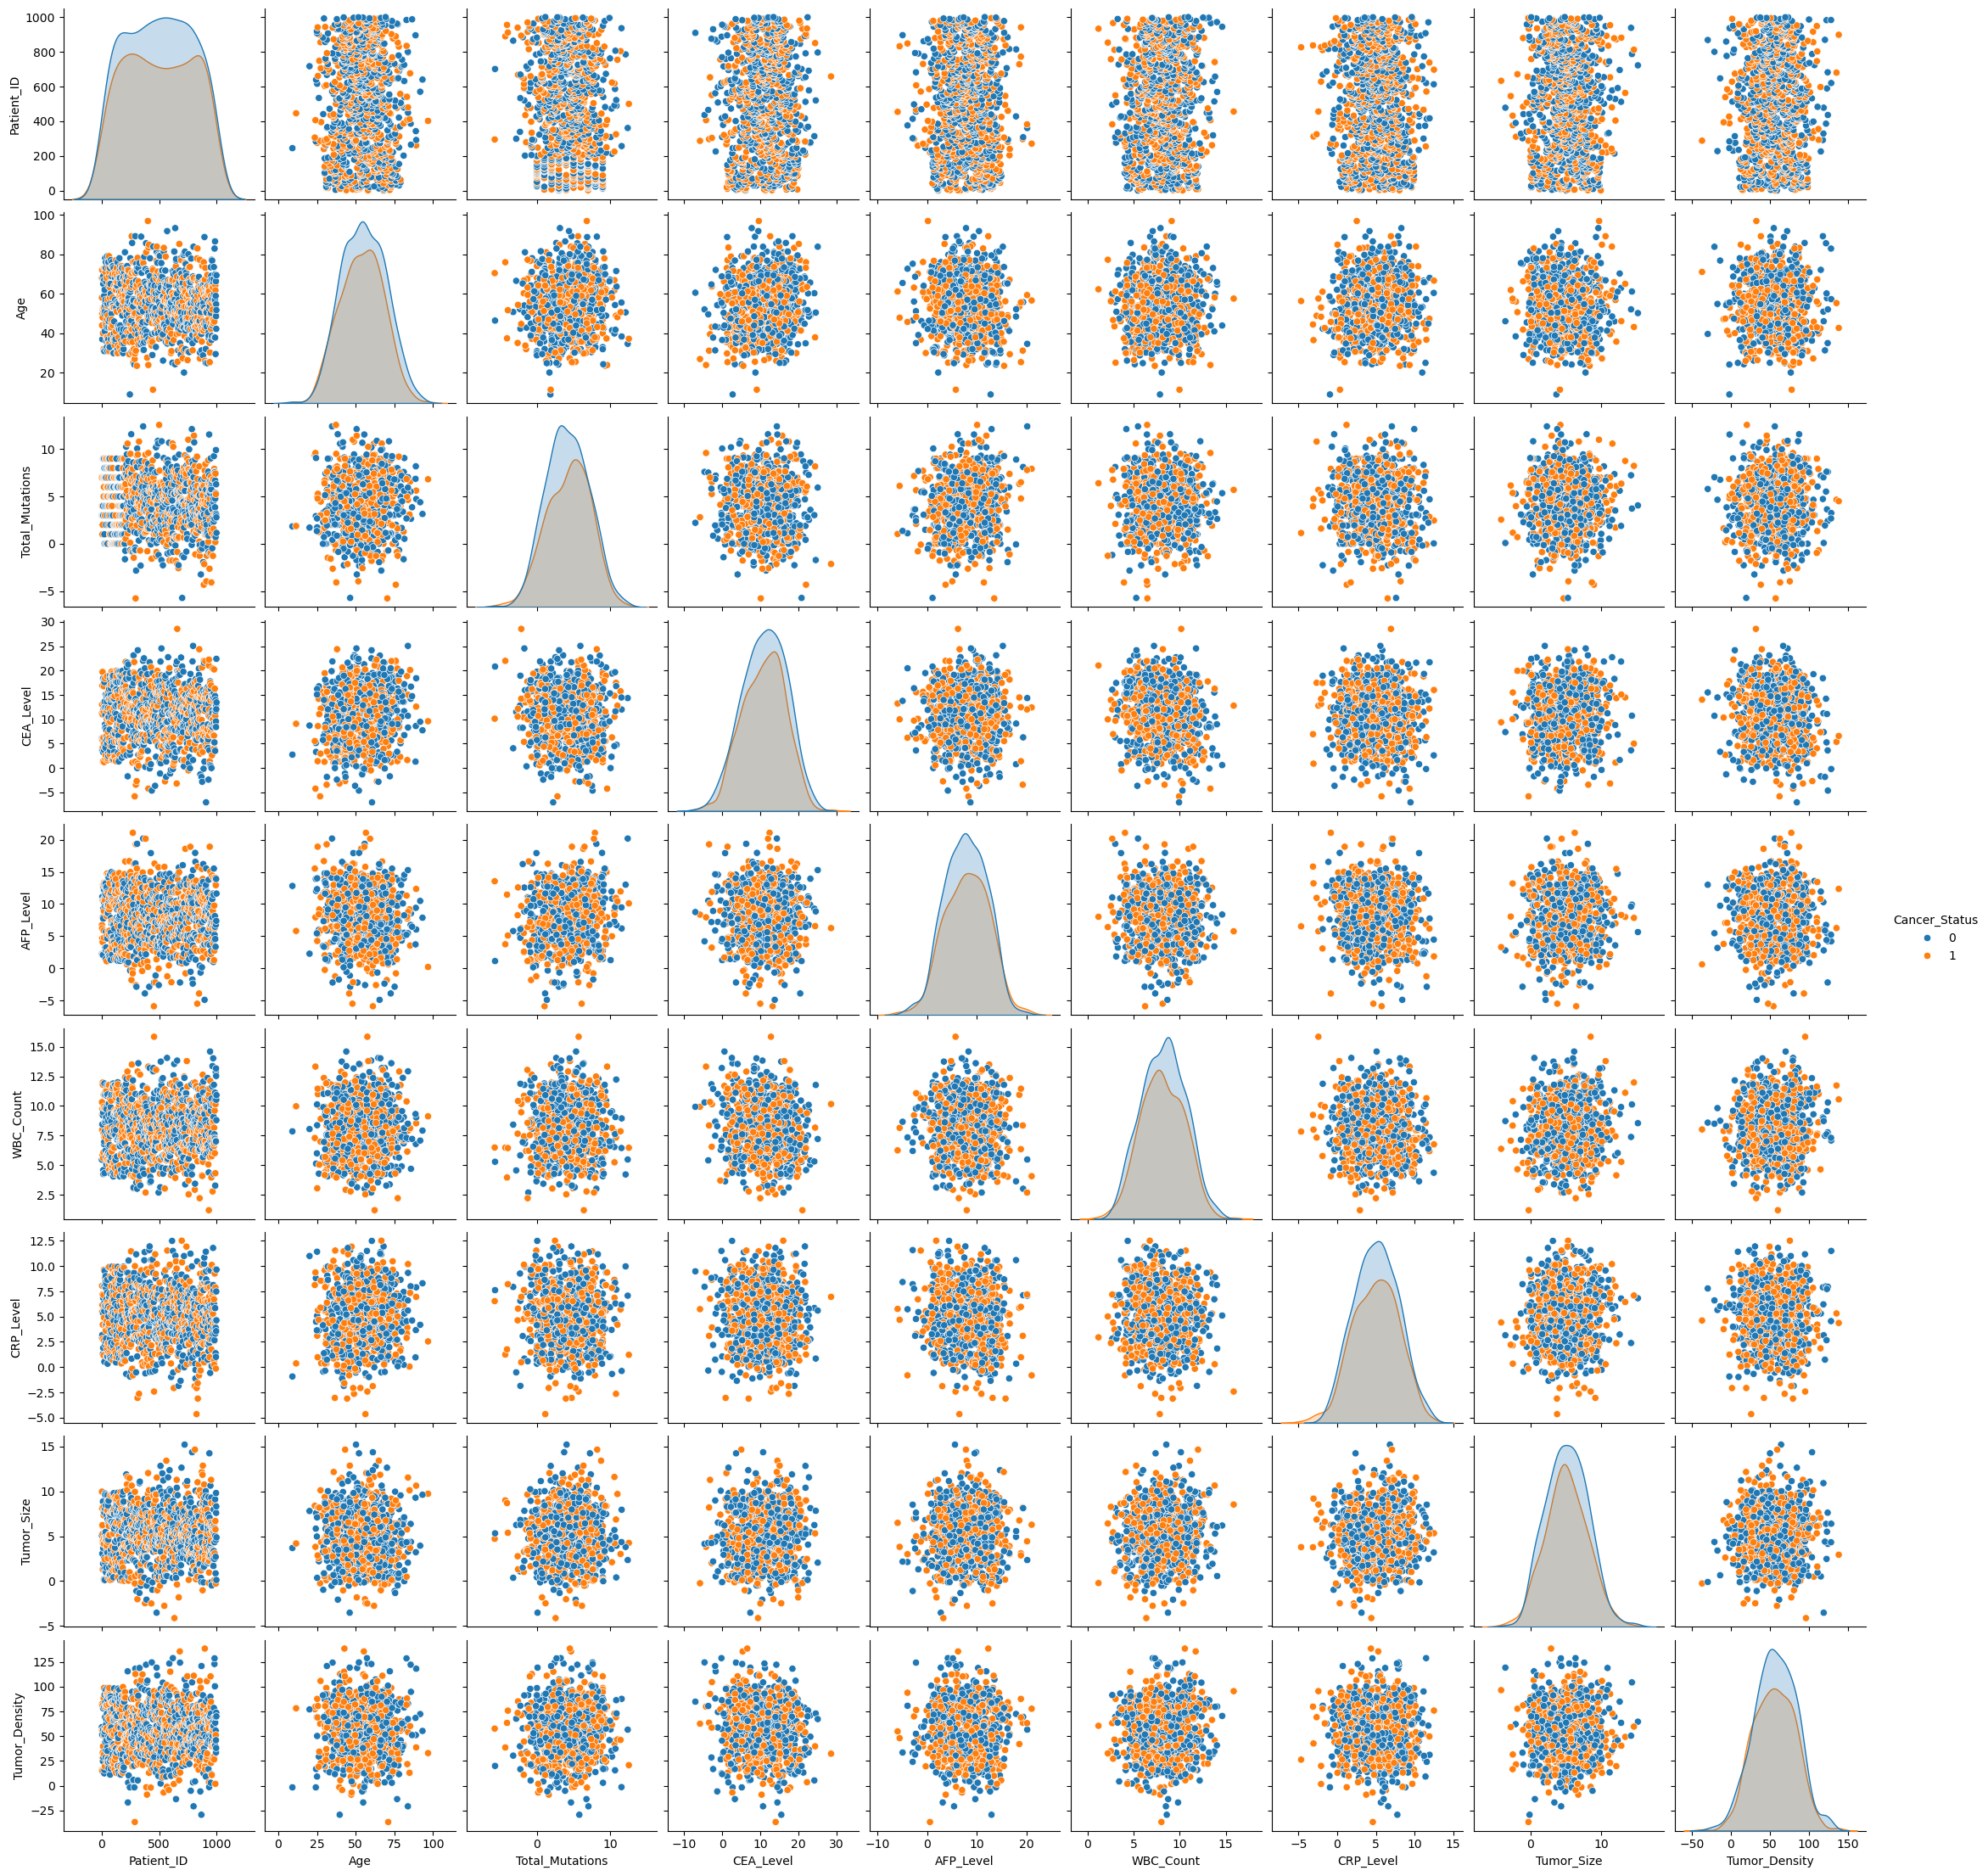

In [7]:
sns.pairplot(df, hue='Cancer_Status')
# There are no clear patterns to be discriminated between healthy and cancer patients across the 1-on-1 numeric variables
# There appear to be some negative values that may need to be coded as NA depending on whether they are possible or not. I.e. is it possible to have a negative number of total mutations? Unlikely.

# Total_Mutations, CEA_Level, AFP_Level, CRP_Level, Tumour_Size, & Tumour_Density all have negative values
# Perhaps CEA_Level, AFP_Level, CRP_Level, Tumour_Size, & Tumour_Density are normalized. But, the distributions show that for both healthy and cancer conditions, negative values are seen only in the left tails of the distribution

# CEA: CEA is typically reported in nanograms per milliliter (ng/mL). The reference range is 0-2.9 ng/mL of blood. Generally, healthcare providers consider typical CEA levels to be between 0 and 2.9 ng/mL. Research indicates that false-positive results are reported with concentrations as high as 35 ng/mL. There’s no magic number or threshold for a CEA test that points to cancer. Healthcare providers don’t use the CEA test to screen for or diagnose cancer. In general, a CEA level of more than 2.9 ng/mL is considered abnormal but doesn’t necessarily mean that cancer is present.
# AFP: AFP levels in men and non-pregnant women vary by age and race but typically range from 0 to 40 ng/mL. Adult blood levels greater than 200 ng/mL in patients with liver cirrhosis strongly indicate hepatocellular carcinoma.
# CRP: Less than 0.3 mg/dL: Normal (level seen in most healthy adults). 0.3 to 1.0 mg/dL: Normal or minor elevation (can be seen in obesity, pregnancy, depression, diabetes, common cold, gingivitis, periodontitis, sedentary lifestyle, cigarette smoking, and genetic polymorphisms). 1.0 to 10.0 mg/dL: Moderate elevation (Systemic inflammation such as RA, SLE, or other autoimmune diseases, malignancies, myocardial infarction, pancreatitis, bronchitis). More than 10.0 mg/dL: Marked elevation (Acute bacterial infections, viral infections, systemic vasculitis, major trauma). More than 50.0 mg/dL: Severe elevation (Acute bacterial infections).


In [8]:
#RemoveNegative = ['Total_Mutations', 'CEA_Level', 'AFP_Level', 'CRP_Level', 'Tumor_Size', 'Tumor_Density']
df.loc[df['Total_Mutations'] < 0, 'Total_Mutations'] = np.nan
df.loc[df['CEA_Level'] < 0, 'CEA_Level'] = np.nan
df.loc[df['AFP_Level'] < 0, 'AFP_Level'] = np.nan
df.loc[df['CRP_Level'] < 0, 'CRP_Level'] = np.nan
df.loc[df['Tumor_Size'] < 0, 'Tumor_Size'] = np.nan
df.loc[df['Tumor_Density'] < 0, 'Tumor_Density'] = np.nan

In [9]:
# Rounding the total mutations
df['Total_Mutations'] = df['Total_Mutations'].round(0)

In [10]:
df.describe()

Patient_ID         Age  Total_Mutations   CEA_Level   AFP_Level  \
count  1000.000000  959.000000       899.000000  930.000000  935.000000   
mean    500.500000   54.600475         4.621802   11.332273    8.167710   
std     288.819436   13.966423         2.638040    5.286934    4.005070   
min       1.000000    9.081122         0.000000    0.234296    0.147357   
25%     250.750000   44.184147         3.000000    7.350547    5.021534   
50%     500.500000   54.861908         5.000000   11.568821    8.014794   
75%     750.250000   64.993496         6.500000   15.145144   11.064347   
max    1000.000000   96.794119        13.000000   28.545501   21.079736   

        WBC_Count   CRP_Level  Tumor_Size  Tumor_Density  
count  963.000000  924.000000  939.000000     940.000000  
mean     8.167887    5.221053    5.313595      57.479970  
std      2.335048    2.670024    2.787230      25.363408  
min      1.188595    0.033948    0.032183       1.672302  
25%      6.451814    3.116955    3.305122      38.740014  
50%      8.155913    5.239191    5.174769      57.373913  
75%      9.888246    7.161572    7.238820      76.281725  
max     15.843519   12.514428   15.208909     138.355756

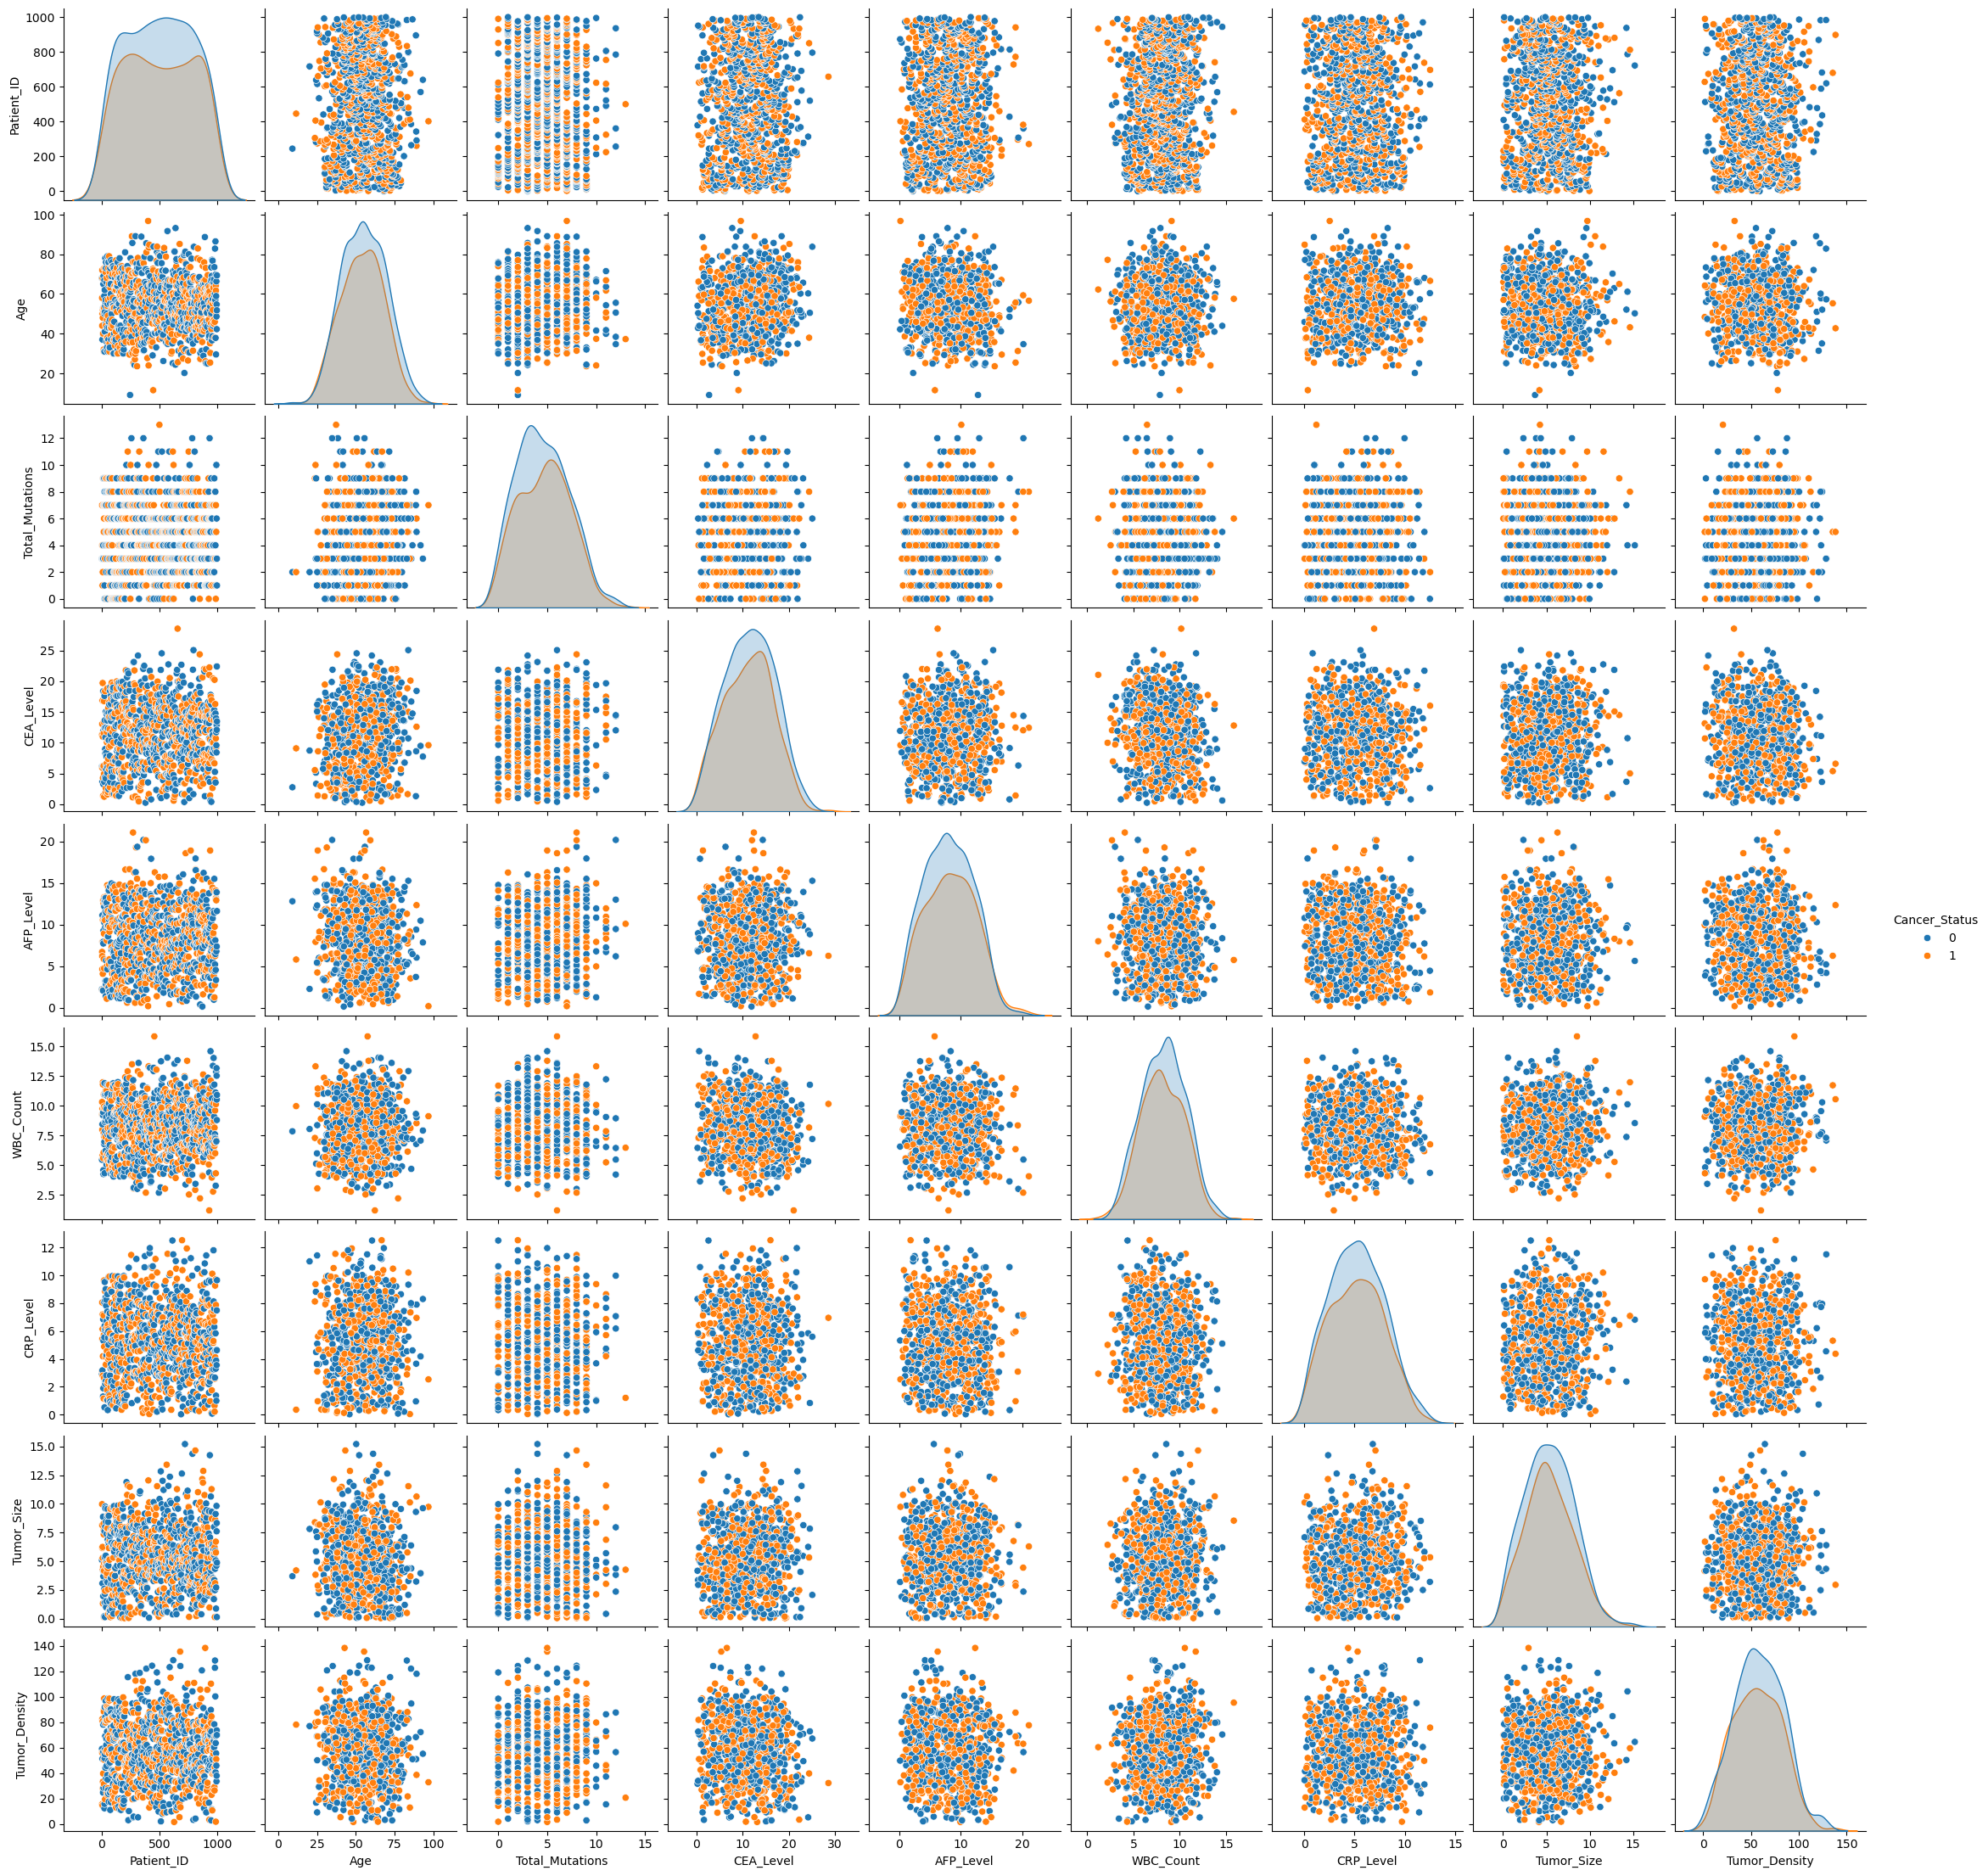

In [11]:
sns.pairplot(df, hue='Cancer_Status')

In [12]:
df.info()
#Still less than 30% missingness

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Patient_ID       1000 non-null   int64   
 1   Age              959 non-null    float64 
 2   Sex              961 non-null    category
 3   Smoking_Status   964 non-null    category
 4   Family_History   961 non-null    category
 5   TP53_Mutation    957 non-null    category
 6   BRCA1_Mutation   967 non-null    category
 7   KRAS_Mutation    954 non-null    category
 8   Total_Mutations  899 non-null    float64 
 9   CEA_Level        930 non-null    float64 
 10  AFP_Level        935 non-null    float64 
 11  WBC_Count        963 non-null    float64 
 12  CRP_Level        924 non-null    float64 
 13  Tumor_Size       939 non-null    float64 
 14  Tumor_Location   959 non-null    category
 15  Tumor_Density    940 non-null    float64 
 16  Cancer_Status    1000 non-null   category
d

Patient_ID        Age  Sex Smoking_Status Family_History TP53_Mutation  \
0             1  68.000000  0.0            0.0            1.0           0.0   
1             2  58.000000  0.0            0.0            0.0           0.0   
2             3  44.000000  1.0            2.0            0.0           1.0   
3             4  72.000000  1.0            2.0            0.0           1.0   
4             5  37.000000  1.0            0.0            1.0           0.0   
..          ...        ...  ...            ...            ...           ...   
995         996  48.649997  0.0            0.0            1.0           0.0   
996         997  54.727711  1.0            0.0            1.0           1.0   
997         998  42.259706  0.0            1.0            0.0           0.0   
998         999  51.773948  1.0            1.0            0.0           1.0   
999        1000  69.343216  0.0            0.0            1.0           0.0   

    BRCA1_Mutation KRAS_Mutation  Total_Mutations  CEA_Level  AFP_Level  \
0              1.0           0.0              3.0   6.104870   2.217815   
1              0.0           0.0              7.0  11.291050   6.718345   
2              1.0           0.0              7.0  13.036086   6.217639   
3              0.0           1.0              4.0   5.899866   4.636553   
4              0.0           0.0              3.0   3.647765  11.127882   
..             ...           ...              ...        ...        ...   
995            0.0           1.0              3.0   8.408760        NaN   
996            1.0           1.0              6.0  12.878634  13.893439   
997            0.0           1.0              3.0  12.077820   7.376058   
998            1.0           NaN              3.0  22.400189        NaN   
999            1.0           0.0              1.0  13.459937  11.626871   

     WBC_Count  CRP_Level  Tumor_Size Tumor_Location  Tumor_Density  \
0     5.456943   2.920242    5.094221            2.0      59.088868   
1    10.317588   3.142171    9.966969            2.0      15.604580   
2     9.269662   8.049956    8.139703            0.0      56.125238   
3     7.985566   5.437697    6.152194            1.0      82.576326   
4     8.442908   3.181946    3.062536            2.0      51.331589   
..         ...        ...         ...            ...            ...   
995  13.164997   4.658324    9.814144            0.0      33.578296   
996  12.528961   3.557984    7.604198            1.0      37.993502   
997  10.520477   7.486140    8.325270            1.0      73.643369   
998   8.798431   4.628390    0.125392            2.0      69.956840   
999  10.912728   9.646480    4.869728            NaN            NaN   

    Cancer_Status  
0               0  
1               1  
2               1  
3               1  
4               0  
..            ...  
995             0  
996             0  
997             0  
998             0  
999             0  

[1000 rows x 17 columns]

In [13]:
print("Sex: ",df.Sex.unique())
print("\nSmoking_Status: ",df.Smoking_Status.unique())
print("\nFamily_History: ",df.Family_History.unique())
print("\nTP53_Mutation: ",df.TP53_Mutation.unique())
print("\nBRCA1_Mutation: ",df.BRCA1_Mutation.unique())
print("\nKRAS_Mutation: ",df.KRAS_Mutation.unique())
print("\nTumor_Location: ",df.Tumor_Location.unique())
print("\nCancer_Status: ",df.Cancer_Status.unique())

Sex:  [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]

Smoking_Status:  [0.0, 2.0, 1.0, NaN]
Categories (3, float64): [0.0, 1.0, 2.0]

Family_History:  [1.0, 0.0, NaN]
Categories (2, float64): [0.0, 1.0]

TP53_Mutation:  [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]

BRCA1_Mutation:  [1.0, 0.0, NaN]
Categories (2, float64): [0.0, 1.0]

KRAS_Mutation:  [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]

Tumor_Location:  [2.0, 0.0, 1.0, NaN]
Categories (3, float64): [0.0, 1.0, 2.0]

Cancer_Status:  [0, 1]
Categories (2, int64): [0, 1]


In [14]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Patient_ID       1000 non-null   int64   
 1   Age              959 non-null    float64 
 2   Sex              961 non-null    category
 3   Smoking_Status   964 non-null    category
 4   Family_History   961 non-null    category
 5   TP53_Mutation    957 non-null    category
 6   BRCA1_Mutation   967 non-null    category
 7   KRAS_Mutation    954 non-null    category
 8   Total_Mutations  899 non-null    float64 
 9   CEA_Level        930 non-null    float64 
 10  AFP_Level        935 non-null    float64 
 11  WBC_Count        963 non-null    float64 
 12  CRP_Level        924 non-null    float64 
 13  Tumor_Size       939 non-null    float64 
 14  Tumor_Location   959 non-null    category
 15  Tumor_Density    940 non-null    float64 
 16  Cancer_Status    1000 non-null   category
d

Patient_ID        Age  Sex Smoking_Status Family_History TP53_Mutation  \
0             1  68.000000  0.0            0.0            1.0           0.0   
1             2  58.000000  0.0            0.0            0.0           0.0   
2             3  44.000000  1.0            2.0            0.0           1.0   
3             4  72.000000  1.0            2.0            0.0           1.0   
4             5  37.000000  1.0            0.0            1.0           0.0   
..          ...        ...  ...            ...            ...           ...   
995         996  48.649997  0.0            0.0            1.0           0.0   
996         997  54.727711  1.0            0.0            1.0           1.0   
997         998  42.259706  0.0            1.0            0.0           0.0   
998         999  51.773948  1.0            1.0            0.0           1.0   
999        1000  69.343216  0.0            0.0            1.0           0.0   

    BRCA1_Mutation KRAS_Mutation  Total_Mutations  CEA_Level  AFP_Level  \
0              1.0           0.0              3.0   6.104870   2.217815   
1              0.0           0.0              7.0  11.291050   6.718345   
2              1.0           0.0              7.0  13.036086   6.217639   
3              0.0           1.0              4.0   5.899866   4.636553   
4              0.0           0.0              3.0   3.647765  11.127882   
..             ...           ...              ...        ...        ...   
995            0.0           1.0              3.0   8.408760        NaN   
996            1.0           1.0              6.0  12.878634  13.893439   
997            0.0           1.0              3.0  12.077820   7.376058   
998            1.0           NaN              3.0  22.400189        NaN   
999            1.0           0.0              1.0  13.459937  11.626871   

     WBC_Count  CRP_Level  Tumor_Size Tumor_Location  Tumor_Density  \
0     5.456943   2.920242    5.094221            2.0      59.088868   
1    10.317588   3.142171    9.966969            2.0      15.604580   
2     9.269662   8.049956    8.139703            0.0      56.125238   
3     7.985566   5.437697    6.152194            1.0      82.576326   
4     8.442908   3.181946    3.062536            2.0      51.331589   
..         ...        ...         ...            ...            ...   
995  13.164997   4.658324    9.814144            0.0      33.578296   
996  12.528961   3.557984    7.604198            1.0      37.993502   
997  10.520477   7.486140    8.325270            1.0      73.643369   
998   8.798431   4.628390    0.125392            2.0      69.956840   
999  10.912728   9.646480    4.869728            NaN            NaN   

    Cancer_Status  
0               0  
1               1  
2               1  
3               1  
4               0  
..            ...  
995             0  
996             0  
997             0  
998             0  
999             0  

[1000 rows x 17 columns]

# Logistic Regression

In [15]:
from sklearn import model_selection
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report, roc_curve, auc, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# import xgboost as xgb

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Patient_ID       1000 non-null   int64   
 1   Age              959 non-null    float64 
 2   Sex              961 non-null    category
 3   Smoking_Status   964 non-null    category
 4   Family_History   961 non-null    category
 5   TP53_Mutation    957 non-null    category
 6   BRCA1_Mutation   967 non-null    category
 7   KRAS_Mutation    954 non-null    category
 8   Total_Mutations  899 non-null    float64 
 9   CEA_Level        930 non-null    float64 
 10  AFP_Level        935 non-null    float64 
 11  WBC_Count        963 non-null    float64 
 12  CRP_Level        924 non-null    float64 
 13  Tumor_Size       939 non-null    float64 
 14  Tumor_Location   959 non-null    category
 15  Tumor_Density    940 non-null    float64 
 16  Cancer_Status    1000 non-null   category
d

In [17]:
# Filling in missing data

X = df.iloc[:,1:-1].select_dtypes(exclude=['category']) # Selecting only the numerical data for scaling
y = df.iloc[:,-1]
CompleteY = y.loc[(y==0) | (y==1)]
CompleteX = X.loc[(y==0) | (y==1)]

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              959 non-null    float64
 1   Total_Mutations  899 non-null    float64
 2   CEA_Level        930 non-null    float64
 3   AFP_Level        935 non-null    float64
 4   WBC_Count        963 non-null    float64
 5   CRP_Level        924 non-null    float64
 6   Tumor_Size       939 non-null    float64
 7   Tumor_Density    940 non-null    float64
dtypes: float64(8)
memory usage: 62.6 KB


In [19]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# Standardize numeric features
scale = StandardScaler()
scaled_array = scale.fit_transform(CompleteX.select_dtypes(include=[float, int]))

# Rebuild into DataFrame with original column names
ScaledX = pd.DataFrame(scaled_array, columns=CompleteX.select_dtypes(include=[float, int]).columns)

# Add back the categorical columns
categorical_cols = CompleteX.select_dtypes(include=['category'])  # or 'object' if not using pd.Categorical
ScaledX = pd.concat([ScaledX, categorical_cols], axis=1)

# Check the final DataFrame
ScaledX.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              959 non-null    float64
 1   Total_Mutations  899 non-null    float64
 2   CEA_Level        930 non-null    float64
 3   AFP_Level        935 non-null    float64
 4   WBC_Count        963 non-null    float64
 5   CRP_Level        924 non-null    float64
 6   Tumor_Size       939 non-null    float64
 7   Tumor_Density    940 non-null    float64
dtypes: float64(8)
memory usage: 62.6 KB


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(ScaledX, CompleteY , test_size=0.2, random_state=42)

imputer = SimpleImputer(missing_values = np.NaN, strategy='median')

X_train2 = imputer.fit_transform(X_train) #this determines the median and adds it to the data
X_test2 = imputer.transform(X_test) #this just adds it to the data

In [21]:
lr = LogisticRegression()
model = lr.fit(X_train2, Y_train)

kfold = model_selection.KFold(n_splits=10)
accuracy_results = model_selection.cross_val_score(model, X_train2, Y_train, cv=kfold)

print("Accuracy Results",accuracy_results)
print('\n')
print("Mean", accuracy_results.mean(), "Standard Dev.", accuracy_results.std())

Accuracy Results [0.5375 0.6    0.475  0.55   0.4625 0.475  0.5125 0.55   0.475  0.55  ]


Mean 0.5187499999999999 Standard Dev. 0.043391387394274464


# Random Forest Decision Tree

In [22]:
rf = RandomForestClassifier()
model2 = rf.fit(X_train2, Y_train)

kfold = model_selection.KFold(n_splits=10)
accuracy_results = model_selection.cross_val_score(model2, X_train2, Y_train, cv=kfold)

print("Accuracy Results",accuracy_results)
print('\n')
print("Mean", accuracy_results.mean(), "Standard Dev.", accuracy_results.std())

Accuracy Results [0.55   0.575  0.5125 0.4875 0.4875 0.4625 0.55   0.4875 0.475  0.575 ]


Mean 0.51625 Standard Dev. 0.04033066451225419


In [23]:
y_pred = model2.predict(X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print(f"True Positives {tp}")
print(f"True Negatives {tn}")
print(f"False Positives {fp}")
print(f"False Negatives {fn}")

# The classifier predicts more of the negative class

True Positives 24
True Negatives 74
False Positives 34
False Negatives 68


c:\Users\Tarzo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [24]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.69      0.59       108
           1       0.41      0.26      0.32        92

    accuracy                           0.49       200
   macro avg       0.47      0.47      0.46       200
weighted avg       0.47      0.49      0.47       200



c:\Users\Tarzo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


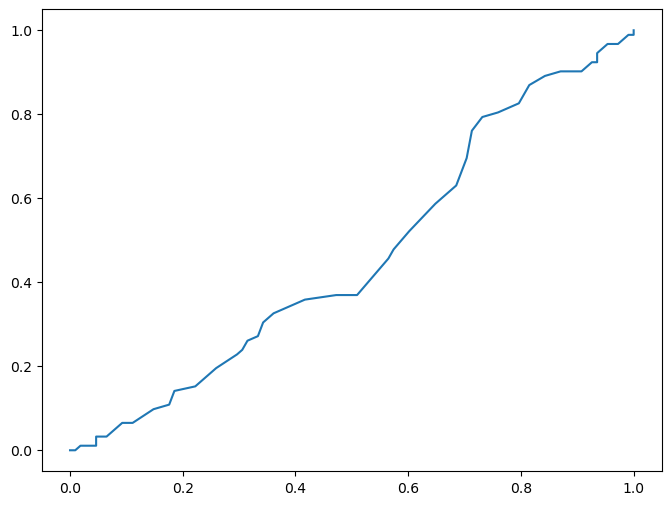

In [25]:
y_probs = model2.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr) 

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay


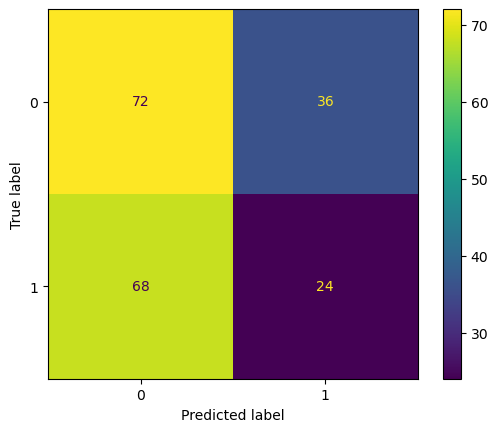

In [27]:

# Generate predictions with the best model
y_pred = model2.predict(X_test2)

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Optimize Random Forest Tree

In [28]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [29]:
from sklearn.model_selection import GridSearchCV

rfr = RandomForestClassifier(random_state=1001)
GridSearch = GridSearchCV(estimator = rfr,
                          param_grid = random_grid,
                          cv = 5,
                          verbose=2,
                          n_jobs = -1)

In [30]:
GridSearch.fit(X_train2,Y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


c:\Users\Tarzo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4320 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3681 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Tarzo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Tarzo\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Tarzo\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Tarzo\anaconda3\Lib\site-pac

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1001),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, 120],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [5, 20, 50, 100]},
             verbose=2)

In [31]:
Best_Params = GridSearch.best_params_
Best_rf = GridSearch.best_estimator_

In [32]:
y_pred = Best_rf.predict(X_test2)

accuracy = accuracy_score(Y_test,y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.48


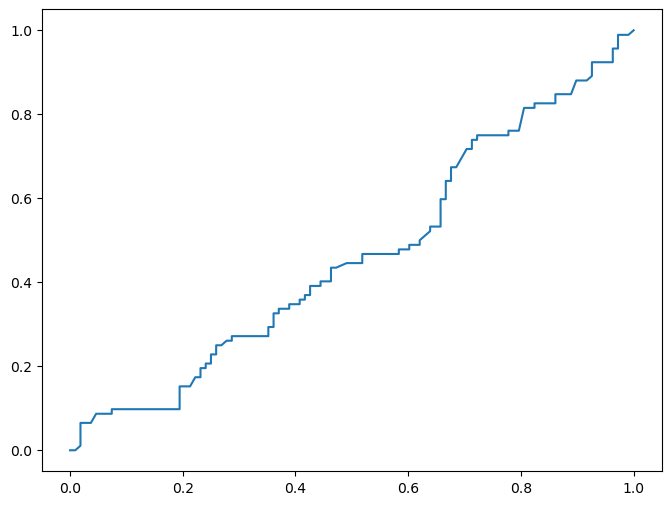

In [33]:
y_probs = Best_rf.predict_proba(X_test2)[:,1]
fpr, tpr, _ = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr,tpr)
rf_fpr, rf_tpr = fpr, tpr 

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr) 


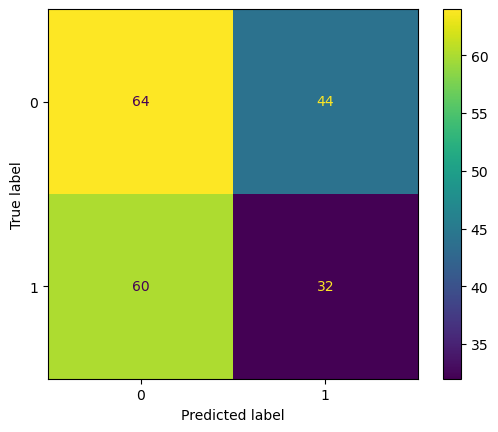

In [34]:
# Generate predictions with the best model
y_pred = Best_rf.predict(X_test2)

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# SMOTE Data

In [35]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [36]:
#Apply Over Sampling
print('Before Oversampling')
print(sorted(Counter(Y_train).items()))
X_train3, Y_train2 = SMOTE().fit_resample(X_train2, Y_train)
print('After Oversampling')
print(sorted(Counter(Y_train2).items()))

Before Oversampling
[(0, 442), (1, 358)]
After Oversampling
[(0, 442), (1, 442)]


# Logistic Regression

In [37]:
lr2 = LogisticRegression()
model = lr2.fit(X_train3, Y_train2)

kfold = model_selection.KFold(n_splits=10)
accuracy_results = model_selection.cross_val_score(model, X_train3, Y_train2, cv=kfold)

print("Accuracy Results",accuracy_results)
print('\n')
print("Mean", accuracy_results.mean(), "Standard Dev.", accuracy_results.std())

Accuracy Results [0.4494382  0.50561798 0.48314607 0.48314607 0.42045455 0.51136364
 0.60227273 0.43181818 0.56818182 0.14772727]


Mean 0.4603166496424923 Standard Dev. 0.11735348377871753


# Decision Tree

In [38]:
GridSearch2 = GridSearchCV(estimator = rfr,
                          param_grid = random_grid,
                          cv = 5,
                          verbose=2,
                          n_jobs = -1)

In [39]:
GridSearch2.fit(X_train3,Y_train2)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


c:\Users\Tarzo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4320 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3415 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Tarzo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Tarzo\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Tarzo\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Tarzo\anaconda3\Lib\site-pac

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1001),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, 120],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [5, 20, 50, 100]},
             verbose=2)

In [40]:
Best_Params2 = GridSearch2.best_params_
Best_rf2 = GridSearch2.best_estimator_

In [41]:
y_pred = Best_rf2.predict(X_test2)

accuracy = accuracy_score(Y_test,y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.45


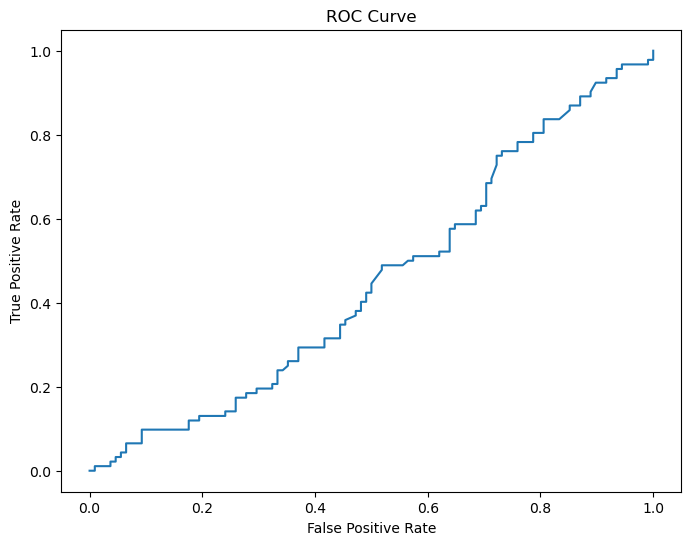

In [42]:
y_probs = Best_rf2.predict_proba(X_test2)[:,1]
fpr, tpr, _ = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr,tpr)

dt_fpr, dt_tpr = fpr, tpr 

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr) 
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

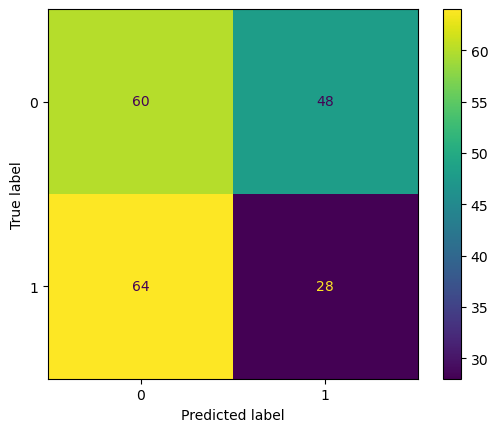

In [ ]:
# Generate predictions with the best model
y_pred = Best_rf2.predict(X_test2)

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

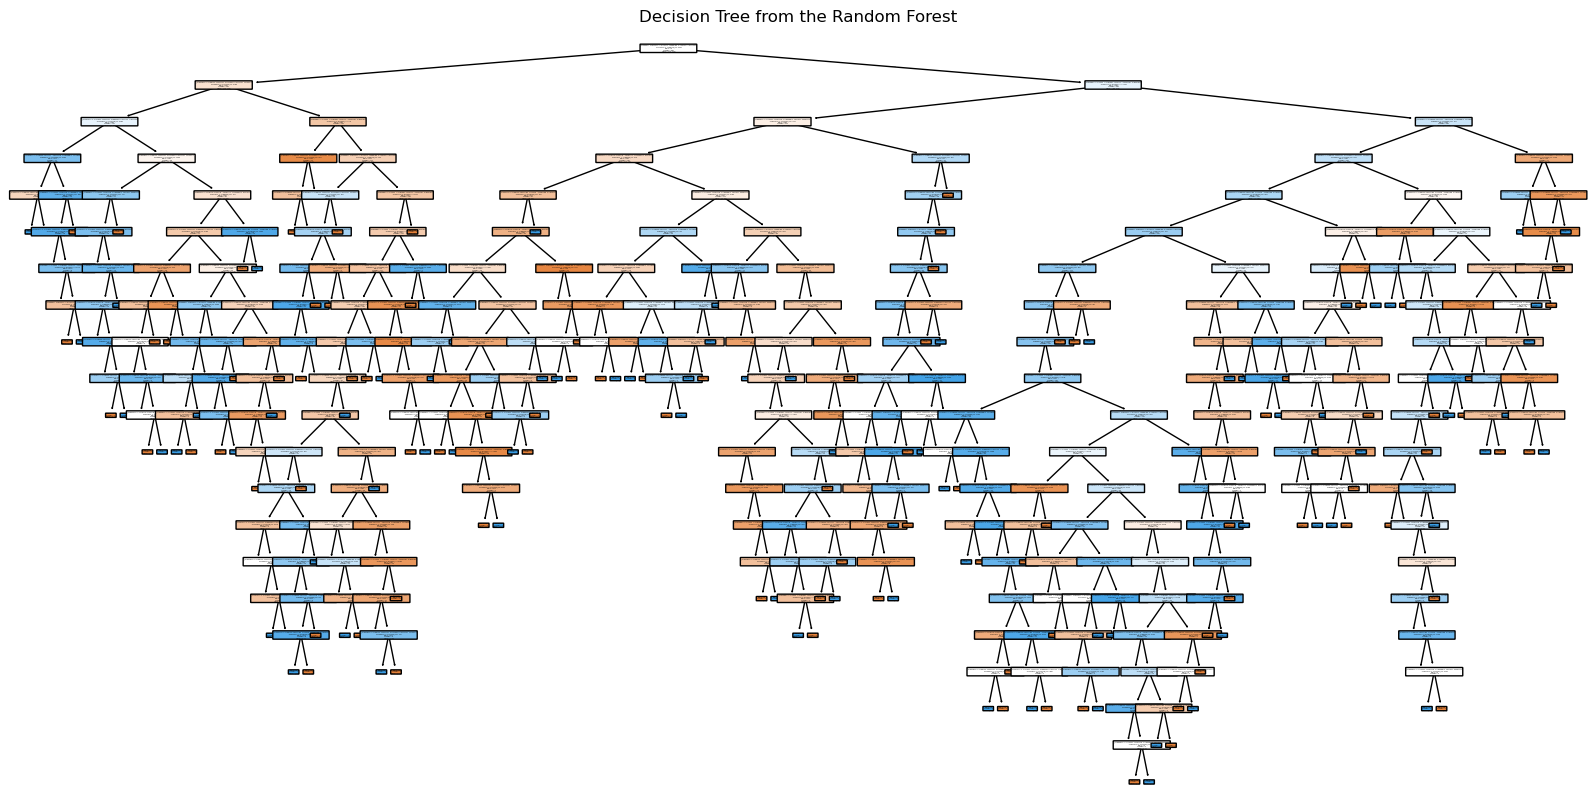

In [ ]:
from sklearn.tree import plot_tree

tree = Best_rf2.estimators_[0]
plt.figure(figsize=(20,10))  # Set figure size to make the tree more readable
plot_tree(tree, 
          feature_names=X_train3,  # Use the feature names from the dataset
          filled=True,              # Fill nodes with colors for better visualization
          rounded=True)             # Rounded edges for nodes
plt.title("Decision Tree from the Random Forest")
plt.show()

In [ ]:
# The data is balanced
for col in df.select_dtypes(include=["category", "object"]).columns:
    print(df[col].value_counts())

Sex
1.0    515
0.0    446
Name: count, dtype: int64
Smoking_Status
1.0    343
0.0    330
2.0    291
Name: count, dtype: int64
Family_History
0.0    529
1.0    432
Name: count, dtype: int64
TP53_Mutation
0.0    504
1.0    453
Name: count, dtype: int64
BRCA1_Mutation
1.0    485
0.0    482
Name: count, dtype: int64
KRAS_Mutation
0.0    482
1.0    472
Name: count, dtype: int64
Tumor_Location
1.0    354
0.0    316
2.0    289
Name: count, dtype: int64
Cancer_Status
0    550
1    450
Name: count, dtype: int64


## KNN 

In [ ]:
# Clustering the data
from sklearn.cluster import KMeans

#imputing the full dataset
clustering_training = ScaledX.dropna()
clustering_targets = df.iloc[clustering_training.index, :].copy()

#scaling the data
scaler = StandardScaler()
# Fit and transform the data
scaled_array = scaler.fit_transform(clustering_training)
# Convert back to DataFrame to keep column names and index
scaled_clustering = pd.DataFrame(scaled_array, columns=clustering_training.columns, index=clustering_training.index)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_clustering)

len(kmeans.labels_)

# Attach cluster labels to a copy of the input data
clustering_targets['Cluster'] = kmeans.labels_

clustering_targets

c:\Users\Tarzo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Patient_ID        Age  Sex Smoking_Status Family_History TP53_Mutation  \
0             1  68.000000  0.0            0.0            1.0           0.0   
1             2  58.000000  0.0            0.0            0.0           0.0   
2             3  44.000000  1.0            2.0            0.0           1.0   
3             4  72.000000  1.0            2.0            0.0           1.0   
4             5  37.000000  1.0            0.0            1.0           0.0   
..          ...        ...  ...            ...            ...           ...   
991         992  29.522382  1.0            1.0            0.0           1.0   
992         993  58.932740  1.0            0.0            0.0           1.0   
994         995  66.331980  1.0            2.0            0.0           NaN   
996         997  54.727711  1.0            0.0            1.0           1.0   
997         998  42.259706  0.0            1.0            0.0           0.0   

    BRCA1_Mutation KRAS_Mutation  Total_Mutations  CEA_Level  AFP_Level  \
0              1.0           0.0              3.0   6.104870   2.217815   
1              0.0           0.0              7.0  11.291050   6.718345   
2              1.0           0.0              7.0  13.036086   6.217639   
3              0.0           1.0              4.0   5.899866   4.636553   
4              0.0           0.0              3.0   3.647765  11.127882   
..             ...           ...              ...        ...        ...   
991            1.0           0.0              1.0  13.961634   3.338614   
992            0.0           0.0              5.0  11.698651  13.006475   
994            0.0           1.0             10.0   9.567560   6.790160   
996            1.0           1.0              6.0  12.878634  13.893439   
997            0.0           1.0              3.0  12.077820   7.376058   

     WBC_Count  CRP_Level  Tumor_Size Tumor_Location  Tumor_Density  \
0     5.456943   2.920242    5.094221            2.0      59.088868   
1    10.317588   3.142171    9.966969            2.0      15.604580   
2     9.269662   8.049956    8.139703            0.0      56.125238   
3     7.985566   5.437697    6.152194            1.0      82.576326   
4     8.442908   3.181946    3.062536            2.0      51.331589   
..         ...        ...         ...            ...            ...   
991   6.950164   1.370067    0.864904            2.0      69.326643   
992  12.863394   3.885509    2.704167            0.0      55.587772   
994   7.006462   1.002557    4.597607            1.0      45.893931   
996  12.528961   3.557984    7.604198            1.0      37.993502   
997  10.520477   7.486140    8.325270            1.0      73.643369   

    Cancer_Status  Cluster  
0               0        0  
1               1        0  
2               1        1  
3               1        1  
4               0        1  
..            ...      ...  
991             0        1  
992             0        1  
994             0        0  
996             0        1  
997             0        1  

[603 rows x 18 columns]

<Axes: xlabel='Cancer_Status', ylabel='Count'>

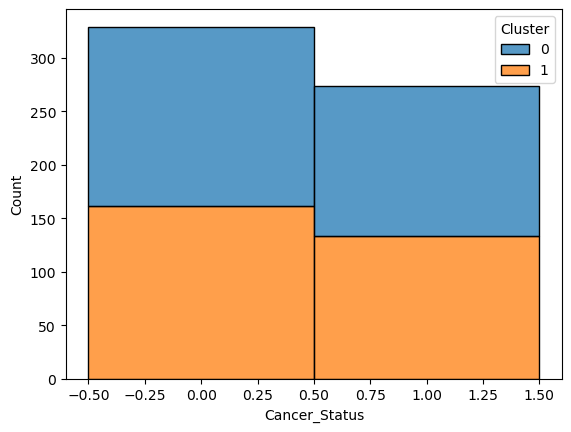

In [ ]:
sns.histplot(data=clustering_targets, x='Cancer_Status', hue='Cluster', multiple='stack', stat='count', common_norm=False, discrete=True)

In [ ]:
#Looking at the distribution of clusters across the cancer status
clustering_targets.groupby('Cancer_Status')['Cluster'].value_counts(normalize=True)

C:\Users\Tarzo\AppData\Local\Temp\ipykernel_10716\2320410524.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clustering_targets.groupby('Cancer_Status')['Cluster'].value_counts(normalize=True)


Cancer_Status  Cluster
0              0          0.510638
               1          0.489362
1              0          0.514599
               1          0.485401
Name: proportion, dtype: float64

C:\Users\Tarzo\AppData\Local\Temp\ipykernel_10716\1974310581.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Cancer_Status')['Cluster']


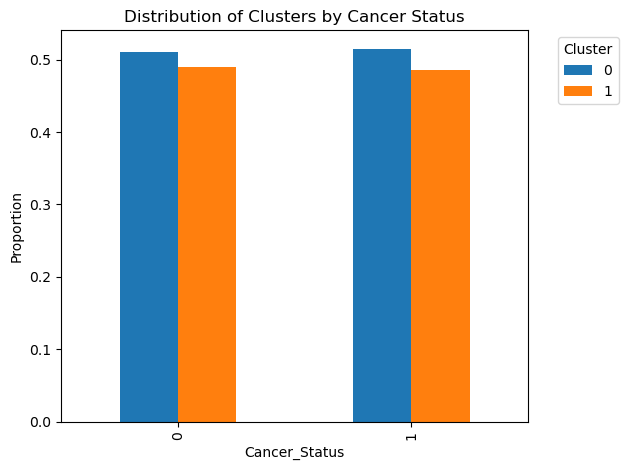

In [ ]:
# Visualize the above
cluster_dist = (
    clustering_targets
    .groupby('Cancer_Status')['Cluster']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

# Plot side-by-side bars (not stacked)
cluster_dist.plot(kind='bar')  # <- no stacked=True
plt.ylabel("Proportion")
plt.title("Distribution of Clusters by Cancer Status")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Axes: >

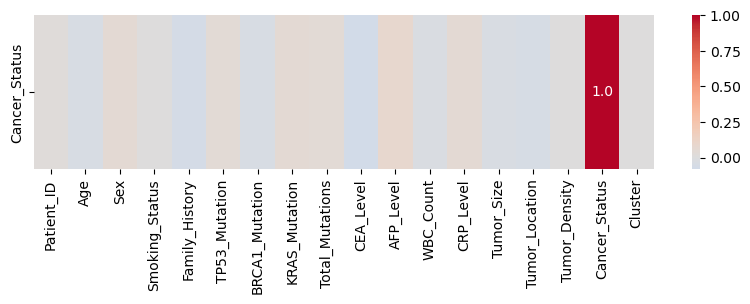

In [ ]:
# Creating a corrplot
from scipy.stats import pearsonr

# Drop NA
clustering_targets = clustering_targets.dropna()

# Correlation matrix
corr = clustering_targets.corr()

# Only keep cancer_status row
target_var = "Cancer_Status"  # replace with your actual column name
if target_var not in clustering_targets.columns:
    raise ValueError(f"'{target_var}' not found in columns.")

# Step 2: Compute p-values only for cancer_status vs others
pvals = pd.Series(index=clustering_targets.columns, dtype=float)
for col in clustering_targets.columns:
    if col != target_var:
        _, p = pearsonr(clustering_targets[target_var], clustering_targets[col])
        pvals[col] = p
pvals[target_var] = np.nan  # p-value for self-correlation is not defined

# Extract only the relevant row from correlation matrix
corr_row = corr.loc[[target_var]]

# Build significance mask for that row
sig_mask_row = pd.DataFrame(True, index=[target_var], columns=clustering_targets.columns)
sig_mask_row.loc[target_var, pvals > 0.05] = False  # only keep p ≤ 0.05

# Annotate only significant correlations
annot_row = corr_row.round(2).astype(str)
annot_row.loc[:, pvals > 0.05] = ""

# Plot
plt.figure(figsize=(10, 2))
sns.heatmap(corr_row, annot=annot_row, fmt="", cmap='coolwarm', center=0)


#No significant correlations between cancer status and any of the other variables
# This is not surprising given the lack of clear patterns in the pairplots


# XGB Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(enable_categorical=True, eval_metric='logloss')
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#0.46 accuracy before optimization

Accuracy: 0.48


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 1],
}
xgb_model = XGBClassifier(enable_categorical=True, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Use all cores
)

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)
#Best Parameters: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}
#Try to model with new set of parameter from CV.m 

XGBmodel = XGBClassifier(enable_categorical=True,  
                      eval_metric='logloss', 
                      n_estimators = 100, 
                      subsample = 1, 
                      max_depth = 5,
                      gamma = 0, 
                      learning_rate = 0.3,
                      colsample_bytree = 1)
XGBmodel.fit(X_train, Y_train)

y_pred = XGBmodel.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Fitting 3 folds for each of 144 candidates, totalling 432 fits


c:\Users\Tarzo\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}
Best Cross-Validated Accuracy: 0.5512611115804492
Accuracy: 0.49


# Model Evaluation & Visualization

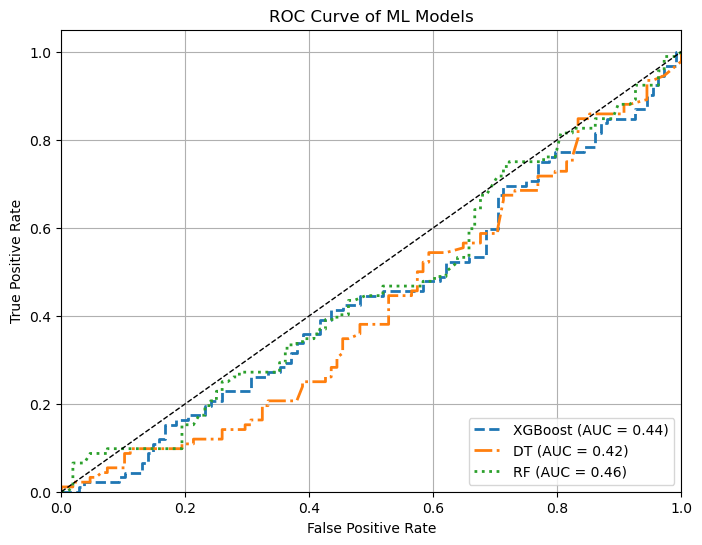

In [ ]:
# KNN 

# XGBoost
y_xgb_probs = XGBmodel.predict_proba(X_test)[:, 1]  # XGB uses X_test
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, y_xgb_probs)
auc_xgb = auc(fpr_xgb, tpr_xgb)

#Decision Tree 
auc_dt = auc(dt_fpr, dt_tpr)

#Random Forest 
auc_rf = auc(rf_fpr, rf_tpr)

#  Plot 
plt.figure(figsize=(8, 6))

#plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', lw=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', lw=2, linestyle='--')
plt.plot(dt_fpr, dt_tpr, label = f'DT (AUC = {auc_dt:.2f})',lw=2, linestyle='-.')
plt.plot(rf_fpr, rf_tpr, label = f'RF (AUC = {auc_rf:.2f})',lw=2, linestyle=':')

plt.plot([0, 1], [0, 1], 'k--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of ML Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()